<a href="https://colab.research.google.com/github/xboymsn/Machine-Learning/blob/main/Heart_disease_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/Heart_diesease_classification_models/heart_2020_cleaned.csv")

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

##Balancing data

In [ ]:
HeartDisease_positive = df[df['HeartDisease']=='Yes']
HeartDisease_negative = df[df['HeartDisease']=='No']

In [ ]:
HeartDisease_negative_sample = HeartDisease_negative.sample(n=27373)

In [ ]:
df_balanced = pd.concat([HeartDisease_positive , HeartDisease_negative_sample], ignore_index=True)

In [ ]:
df_balanced["HeartDisease"].value_counts()

Yes    27373
No     27373
Name: HeartDisease, dtype: int64

In [ ]:
df_balanced

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
1,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
2,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
3,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
4,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,No,40.61,No,Yes,No,2.0,30.0,No,Male,40-44,White,No,Yes,Good,6.0,No,No,No
54742,No,31.75,Yes,No,No,0.0,0.0,No,Female,30-34,White,No,Yes,Very good,5.0,No,Yes,No
54743,No,33.23,Yes,No,No,30.0,15.0,Yes,Male,60-64,White,Yes,Yes,Poor,4.0,No,No,No
54744,No,23.63,Yes,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Good,8.0,No,No,No


##Separating features and labels

In [ ]:
X = df_balanced.drop(columns=["HeartDisease"])
Y = df_balanced[["HeartDisease"]]

In [ ]:
order = ["Smoking" , "AlcoholDrinking" ,"Stroke" ,"DiffWalking","PhysicalActivity","Asthma","KidneyDisease","SkinCancer" ,"Sex","Race","Diabetic","GenHealth","AgeCategory","BMI","PhysicalHealth","MentalHealth","SleepTime"]
X = X[order]

In [ ]:
X.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Sex,Race,Diabetic,GenHealth,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime
0,Yes,No,No,Yes,No,No,No,No,Female,Black,No,Fair,75-79,28.87,6.0,0.0,12.0
1,Yes,No,No,Yes,No,Yes,No,No,Male,White,Yes,Poor,60-64,34.30,30.0,0.0,15.0
2,Yes,No,Yes,Yes,Yes,No,No,Yes,Male,White,Yes,Poor,75-79,32.98,10.0,0.0,4.0
3,No,No,No,Yes,No,No,No,Yes,Female,White,Yes,Good,80 or older,25.06,0.0,0.0,7.0
4,Yes,No,No,Yes,Yes,No,Yes,No,Female,White,Yes,Fair,75-79,30.23,6.0,2.0,8.0


In [ ]:
X['AgeCategory'].value_counts()

70-74          7216
80 or older    7104
65-69          7016
60-64          6103
75-79          5716
55-59          4875
50-54          3621
45-49          2717
40-44          2420
35-39          2156
18-24          2141
30-34          1935
25-29          1726
Name: AgeCategory, dtype: int64

In [ ]:
Y.head()

,HeartDisease
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


#Data Preprocessing

##Handling missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')

imputer.fit(X.iloc[:,13:-1])
X.iloc[:,13:-1] = imputer.transform(X.iloc[:,13:-1])

AttributeError: ignored

##Encoding categorical data

###Independent data

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# columns_to_encode = ["","Race","GenHealth","AgeCategory"]
# columns_to_keep = ["Smoking" , "AlcoholDrinking" ,"Stroke" ,"DiffWalking","Diabetic","PhysicalActivity","Asthma","KidneyDisease","SkinCancer","BMI","PhysicalHealth","MentalHealth","SleepTime"]
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),columns_to_encode)], remainder='passthrough')

# X = np.array(ct.fit_transform(X))
# encoded_column_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=columns_to_encode)
# X = pd.DataFrame(X,columns=list(encoded_column_names)+columns_to_keep)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ["Race","Diabetic","GenHealth","AgeCategory"]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)],remainder='passthrough' )

X = np.array(ct.fit_transform(X))

###Dependent data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(28,37):
  X[:,i] = le.fit_transform(X[:,i])

Y = le.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X

array([[0.0, 0.0, 1.0, ..., 6.0, 0.0, 12.0],
       [0.0, 0.0, 0.0, ..., 30.0, 0.0, 15.0],
       [0.0, 0.0, 0.0, ..., 10.0, 0.0, 4.0],
       ...,
       [0.0, 0.0, 0.0, ..., 30.0, 15.0, 4.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 8.0],
       [0.0, 0.0, 1.0, ..., 30.0, 1.0, 5.0]], dtype=object)

In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

##Seperating train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
len(X_train)

43796

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:,37:41] = sc.fit_transform(X_train[:,37:41])
X_test[:,37:41] = sc.fit_transform(X_test[:,37:41])

##K_Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, random_state = None , shuffle = False)

#Classifiers

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score , precision_score, recall_score, classification_report

In [ ]:
def plot_confusion_matrix(ax, cm, title="Confusion_matrix", cmap='viridis'):
  sn.heatmap(cm, annot=True, linewidth=0.8, fmt='d', cmap=cmap, ax=ax)
  ax.set_xlabel('Predicted',fontsize=16)
  ax.set_ylabel('Truth',fontsize=16)
  ax.set_title(title,fontsize=16)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f_measure = f1_score(Y_test,y_pred)

print(f"Confusion_matrix:\n{cm}\nAccuracy:{acc}\nPrecision:{precision}\nRecall:{recall}\nF_measure:{f_measure}\n*****************\n")

Confusion_matrix:
[[3759 1786]
 [1742 3663]]
Accuracy:0.6778082191780822
Precision:0.67223343732795
Recall:0.6777058279370953
F_measure:0.6749585406301823
*****************



In [ ]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
params_dt = {"criterion":['gini','entropy'],"max_depth":[100],"random_state":[1024]}
dt_cv = GridSearchCV(dt,param_grid=params_dt,cv=cv,n_jobs=-1,verbose=1)
dt_cv.fit(X_train,Y_train)

print("Best Hyper Parameters for SMOTE: ",dt_cv.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [ ]:
from sklearn.metrics import classification_report
y_pred_dt = dt_cv.predict(X_test)
print(classification_report(Y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      5545
           1       0.67      0.67      0.67      5405

    accuracy                           0.67     10950
   macro avg       0.67      0.67      0.67     10950
weighted avg       0.67      0.67      0.67     10950



In [ ]:
accuracy_score(Y_test,y_pred_dt)

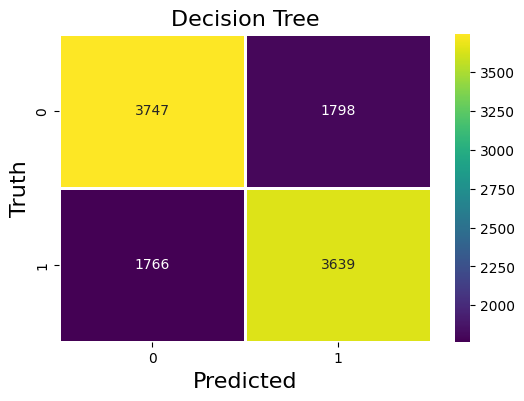

In [ ]:
%matplotlib inline
import seaborn as sn

cm_dt = confusion_matrix(Y_test,y_pred_dt)

fig , axs = plt.subplots(1,1, figsize=(6,4))

plot_confusion_matrix(axs,cm_dt,title="Decision Tree")

plt.show()

##SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
cm = {"linear":None,"rbf":None,"poly":None,"sigmoid":None}
for k in  ["linear", "rbf", "poly", "sigmoid"]:
  svm = SVC(kernel=k)
  params_svm = {"random_state":[1024]}
  svm_cv = GridSearchCV(svm,param_grid=params_svm,cv=cv,n_jobs=-1,verbose=1)
  svm_cv.fit(X_train,Y_train)

  y_pred = svm_cv.predict(X_test)
  print(f"*************\n{k}:\n{classification_report(Y_test, y_pred)}\n*************\nAccuracy: {accuracy_score(Y_test,y_pred)}\n*************")

  cm[k] = confusion_matrix(Y_test,y_pred)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
*************
linear:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5545
           1       0.74      0.80      0.77      5405

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950

*************
Fitting 10 folds for each of 1 candidates, totalling 10 fits
*************
rbf:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      5545
           1       0.72      0.82      0.77      5405

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950

*************
Fitting 10 folds for each of 1 candidates, totalling 10 fits
*************
poly:
              precision    recall  f1-score   support

           0       

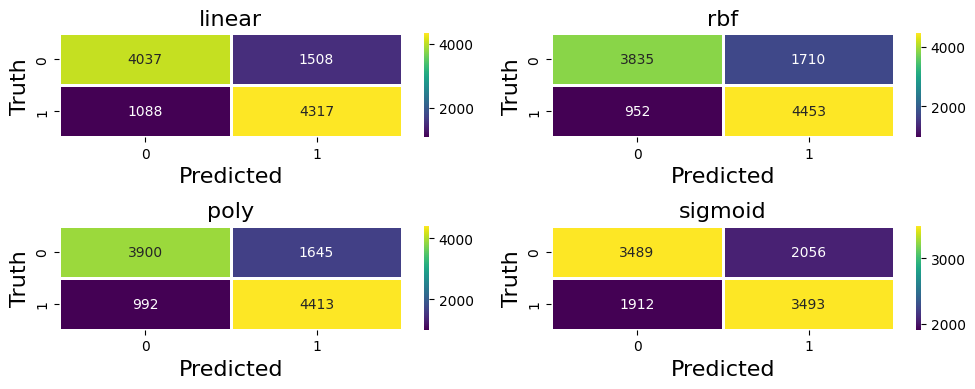

In [ ]:
fig , axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm["linear"], title="linear")
plot_confusion_matrix(axs[0,1], cm["rbf"], title="rbf")
plot_confusion_matrix(axs[1,0], cm["poly"], title="poly")
plot_confusion_matrix(axs[1,1], cm["sigmoid"], title="sigmoid")


plt.tight_layout()
plt.show()

In [ ]:
gamma = 0.1

while gamma<=1:
    classifier = SVC(kernel="rbf" , gamma = gamma)
    classifier.fit(X_train,Y_train)

    y_pred = classifier.predict(X_test)
    # cm = confusion_matrix(Y_test,y_pred)
    # acc = accuracy_score(Y_test,y_pred)
    # precision = precision_score(Y_test,y_pred)
    # recall = recall_score(Y_test,y_pred)
    # f_measure = f1_score(Y_test,y_pred)

    # print(f"Gamma:{gamma}\nConfusion_matrix:\n{cm}\nAccuracy:{acc}\nPrecision:{precision}\nRecall:{recall}\nF_measure:{f_measure}\n*****************\n")
    print(f'Gamma: {gamma}\n{classification_report(Y_test, y_pred)}\n{confusion_matrix(Y_test,y_pred)}\nAccuracy: {accuracy_score(Y_test,y_pred)}')
    gamma+=0.3

Gamma: 0.1
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      5545
           1       0.72      0.82      0.77      5405

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950

[[3830 1715]
 [ 951 4454]]
Gamma: 0.4
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5545
           1       0.73      0.81      0.77      5405

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950

[[3886 1659]
 [1004 4401]]
Gamma: 0.7
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      5545
           1       0.71      0.82      0.76      5405

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.

In [ ]:
gamma = 0.01

while gamma<=0.1:
    classifier = SVC(kernel="rbf" , gamma = gamma)
    classifier.fit(X_train,Y_train)

    y_pred = classifier.predict(X_test)
    # cm = confusion_matrix(Y_test,y_pred)
    # acc = accuracy_score(Y_test,y_pred)
    # precision = precision_score(Y_test,y_pred)
    # recall = recall_score(Y_test,y_pred)
    # f_measure = f1_score(Y_test,y_pred)

    # print(f"Gamma:{gamma}\nConfusion_matrix:\n{cm}\nAccuracy:{acc}\nPrecision:{precision}\nRecall:{recall}\nF_measure:{f_measure}\n*****************\n")
    print(f'Gamma: {gamma}\n{classification_report(Y_test, y_pred)}\n{confusion_matrix(Y_test,y_pred)}')
    gamma+=0.03

Gamma:0.01
Confusion_matrix:
[[3999 1494]
 [1027 4430]]
Accuracy:0.7697716894977169
Precision:0.7478055367994598
Recall:0.8118013560564412
F_measure:0.7784904665670854
*****************

Gamma:0.02
Confusion_matrix:
[[3892 1601]
 [ 940 4517]]
Accuracy:0.7679452054794521
Precision:0.7383131742399477
Recall:0.8277441817848635
F_measure:0.7804751619870411
*****************

Gamma:0.03
Confusion_matrix:
[[3850 1643]
 [ 904 4553]]
Accuracy:0.7673972602739726
Precision:0.7348289218850872
Recall:0.8343412131207624
F_measure:0.781429674761864
*****************

Gamma:0.04
Confusion_matrix:
[[3835 1658]
 [ 894 4563]]
Accuracy:0.7669406392694064
Precision:0.7334833628034078
Recall:0.8361737218251787
F_measure:0.7814694296968658
*****************

Gamma:0.05
Confusion_matrix:
[[3854 1639]
 [ 894 4563]]
Accuracy:0.768675799086758
Precision:0.735730409545308
Recall:0.8361737218251787
F_measure:0.7827429453640964
*****************

Gamma:0.060000000000000005
Confusion_matrix:
[[3865 1628]
 [ 901 455

##Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
params_lr = {"random_state":[1024]}
lr_cv = GridSearchCV(lr,param_grid=params_lr,cv=cv,n_jobs=-1,verbose=1)
lr_cv.fit(X_train,Y_train)

y_pred = lr_cv.predict(X_test)
print(f"*************\n{classification_report(Y_test, y_pred)}\n*************")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
*************
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5530
           1       0.75      0.77      0.76      5420

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950

*************


In [ ]:
accuracy_score(Y_test,y_pred)

0.7601826484018265

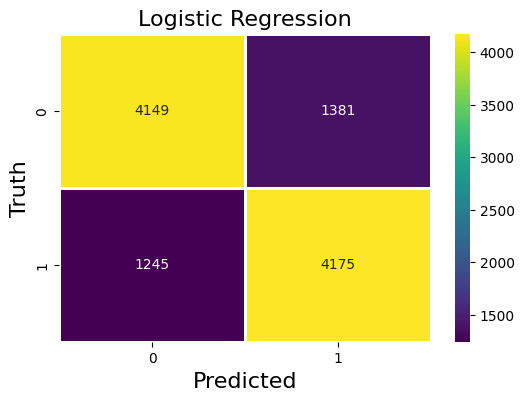

In [ ]:
%matplotlib inline
import seaborn as sn

cm = confusion_matrix(Y_test,y_pred)

fig , axs = plt.subplots(1,1, figsize=(6,4))

plot_confusion_matrix(axs,cm,title="Logistic Regression")

plt.show()

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=3)
# params_knn = {"random_state":[1024]}
# knn_cv = GridSearchCV(knn,param_grid=params_knn,cv=cv,n_jobs=-1,verbose=1)
# knn_cv.fit(X_train,Y_train)

# y_pred = knn_cv.predict(X_test)
# print(f"*************\n{classification_report(Y_test, y_pred)}\n*************")

In [ ]:
accuracy_score(Y_test,y_pred)

0.708310502283105

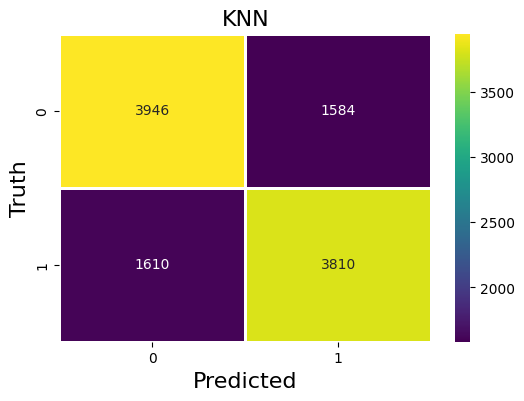

In [ ]:
%matplotlib inline
import seaborn as sn

cm = confusion_matrix(Y_test,y_pred)

fig , axs = plt.subplots(1,1, figsize=(6,4))

plot_confusion_matrix(axs,cm,title="KNN")

plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_pred)

0.7084018264840183

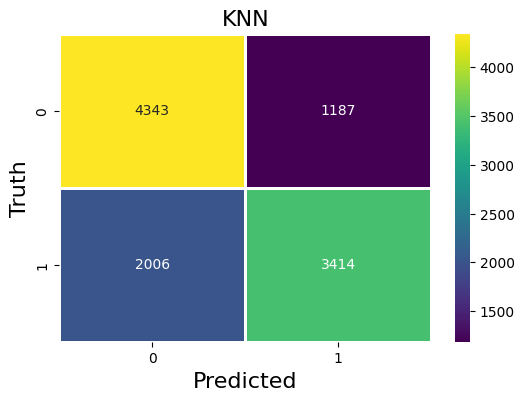

In [ ]:
%matplotlib inline
import seaborn as sn

cm = confusion_matrix(Y_test,y_pred)

fig , axs = plt.subplots(1,1, figsize=(6,4))

plot_confusion_matrix(axs,cm,title="KNN")

plt.show()

##Deep Learning

#Data Understanding

In [ ]:
columns_df = list(df_balanced.columns.values)

In [ ]:
for column in columns_df:
  print(column,':',str(df_balanced[column].unique()))

HeartDisease : ['Yes' 'No']
BMI : [28.87 34.3  32.98 ... 45.7  30.1  53.48]
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
PhysicalHealth : [ 6. 30. 10.  0.  3.  2. 20.  5.  7.  1. 15. 21. 14. 18. 26. 25.  4. 12.
 16. 29. 28.  8.  9. 22. 17. 13. 27. 24. 23. 19. 11.]
MentalHealth : [ 0.  2. 30. 20.  3.  5.  1. 15. 16. 12.  4.  7. 14. 10.  6. 25.  8. 22.
 28.  9. 13. 29. 21. 27. 24. 26. 11. 17. 18. 19. 23.]
DiffWalking : ['Yes' 'No']
Sex : ['Female' 'Male']
AgeCategory : ['75-79' '60-64' '80 or older' '70-74' '55-59' '65-69' '50-54' '45-49'
 '35-39' '40-44' '25-29' '30-34' '18-24']
Race : ['Black' 'White' 'Other' 'American Indian/Alaskan Native' 'Asian'
 'Hispanic']
Diabetic : ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['No' 'Yes']
GenHealth : ['Fair' 'Poor' 'Good' 'Very good' 'Excellent']
SleepTime : [12. 15.  4.  7.  8. 10.  9.  6.  5.  3. 20. 11.  1. 18. 16.  2. 14. 24.
 19. 22. 13. 17. 21. 23.]
Asthma : ['No' 'Yes']

In [ ]:
numerical_features = df_balanced.select_dtypes(include=np.number)

In [ ]:
categorical_features = df_balanced.select_dtypes(include=[object])

In [ ]:
categorical_features

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,Yes,No,No,Yes,Female,75-79,Black,No,No,Fair,No,No,No
1,Yes,Yes,No,No,Yes,Male,60-64,White,Yes,No,Poor,Yes,No,No
2,Yes,Yes,No,Yes,Yes,Male,75-79,White,Yes,Yes,Poor,No,No,Yes
3,Yes,No,No,No,Yes,Female,80 or older,White,Yes,No,Good,No,No,Yes
4,Yes,Yes,No,No,Yes,Female,75-79,White,Yes,Yes,Fair,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,No,No,No,No,No,Male,55-59,American Indian/Alaskan Native,No,Yes,Very good,Yes,No,Yes
54742,No,No,No,No,No,Female,25-29,Hispanic,Yes (during pregnancy),Yes,Good,No,No,No
54743,No,No,No,No,No,Female,45-49,White,No,Yes,Good,No,No,No
54744,No,Yes,No,No,No,Male,25-29,Asian,No,Yes,Excellent,No,No,No


##Generate descriptive statistics

In [ ]:
df_balanced.describe()[1:][list(numerical_features)].T.style.background_gradient(cmap="Blues")

,mean,std,min,25%,50%,75%,max
BMI,28.811049,6.460154,12.020000,24.390000,27.760000,32.040000,87.050000
PhysicalHealth,5.362967,9.959012,0.000000,0.000000,0.000000,5.000000,30.000000
MentalHealth,4.241935,8.559122,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.115095,1.603550,1.000000,6.000000,7.000000,8.000000,24.000000


##Exploratory Data Analysis

###Univariate Visualization

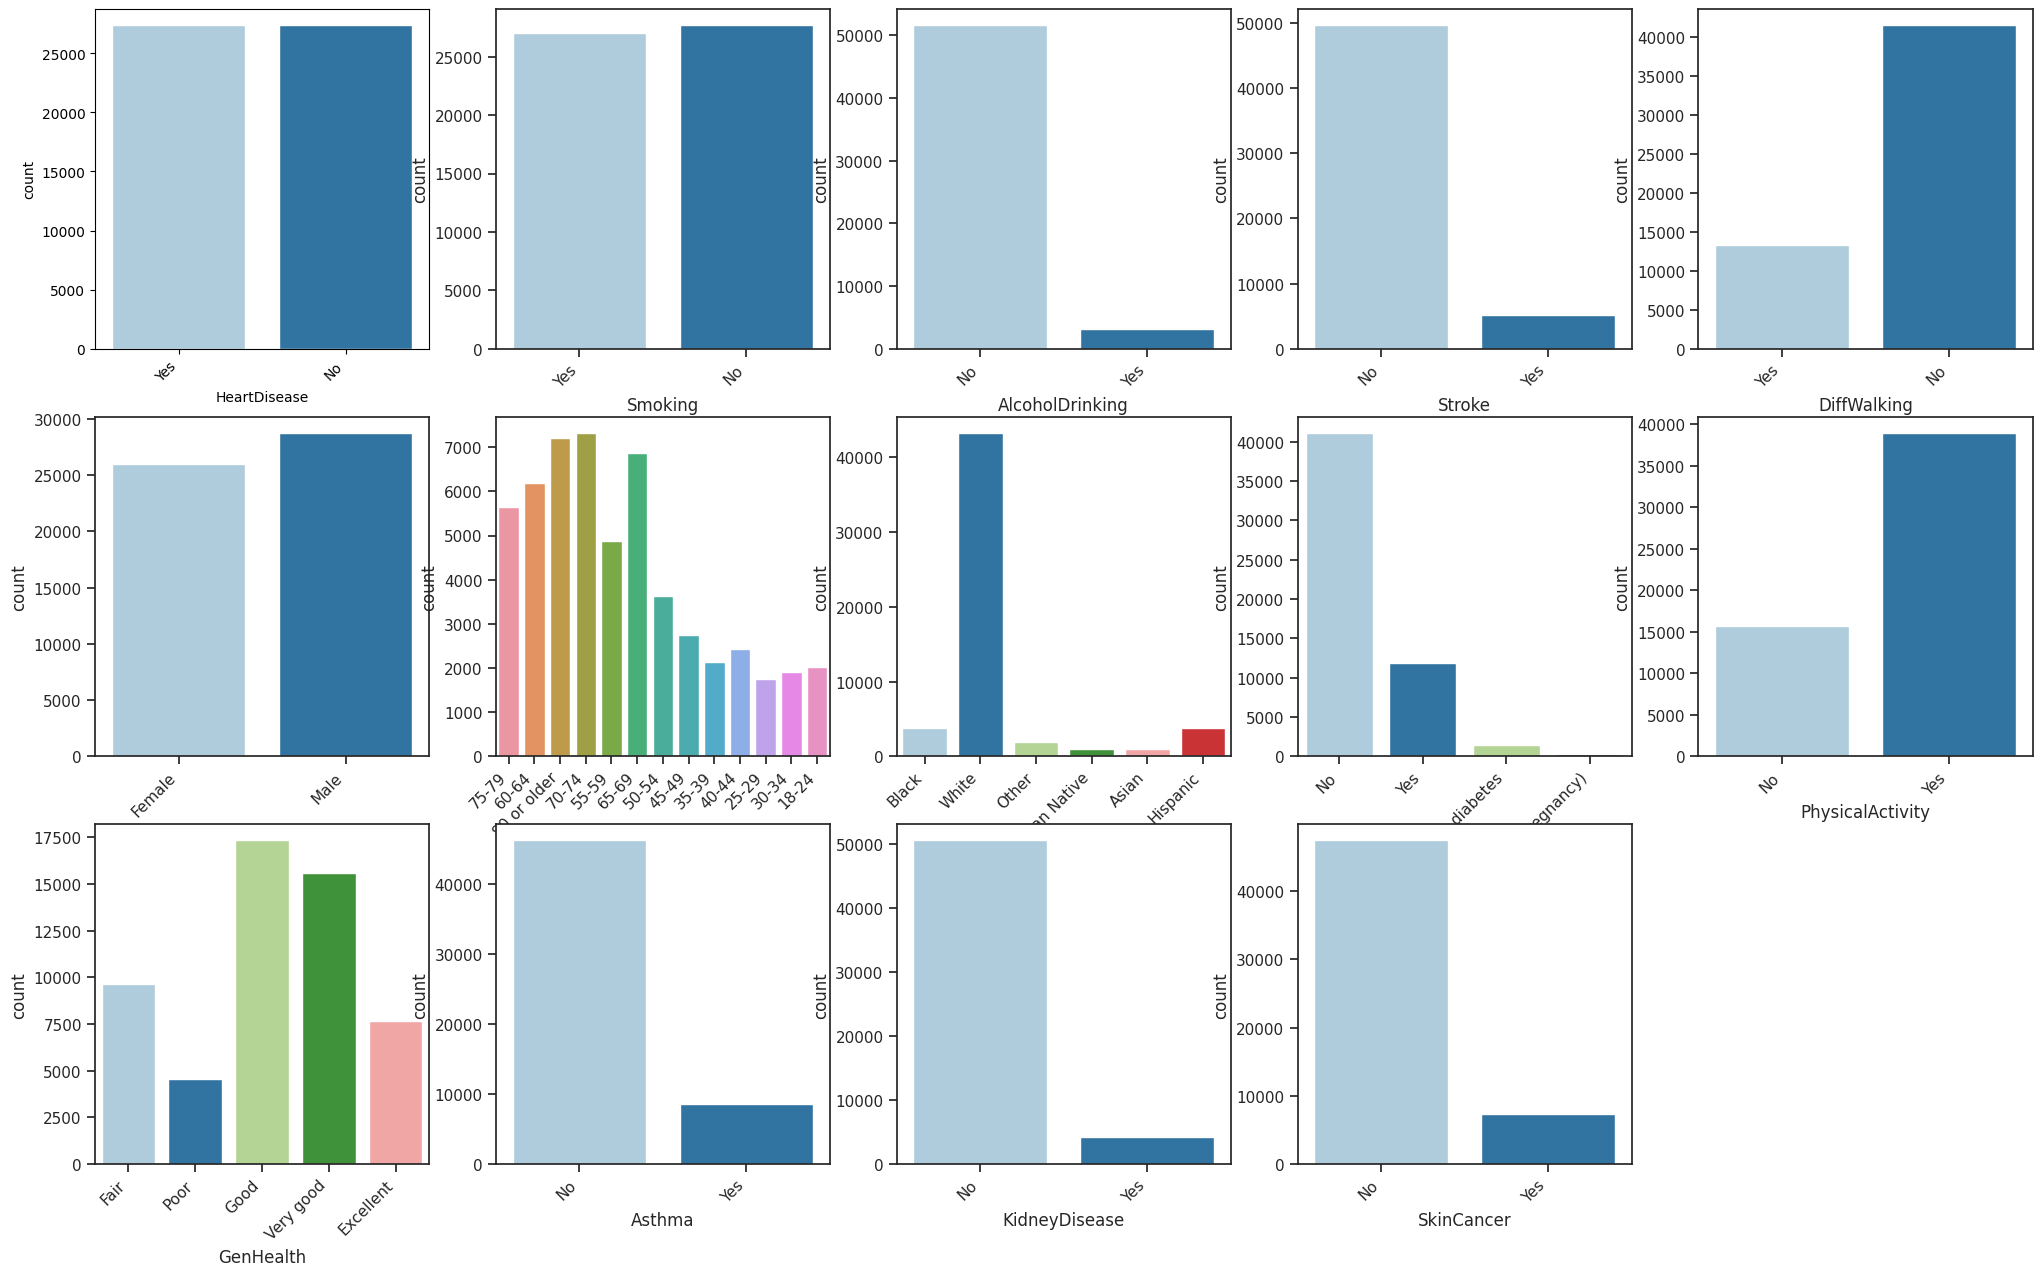

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def Categorical_features_func():
  i=1
  plt.figure(figsize=(25,15))
  for feature in categorical_features:
    plt.subplot(3,5,i)
    sns.set(palette='Paired')
    sns.set_style("ticks")
    ax = sns.countplot(x = feature,data = df_balanced)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right")
    i+=1

Categorical_features_func()

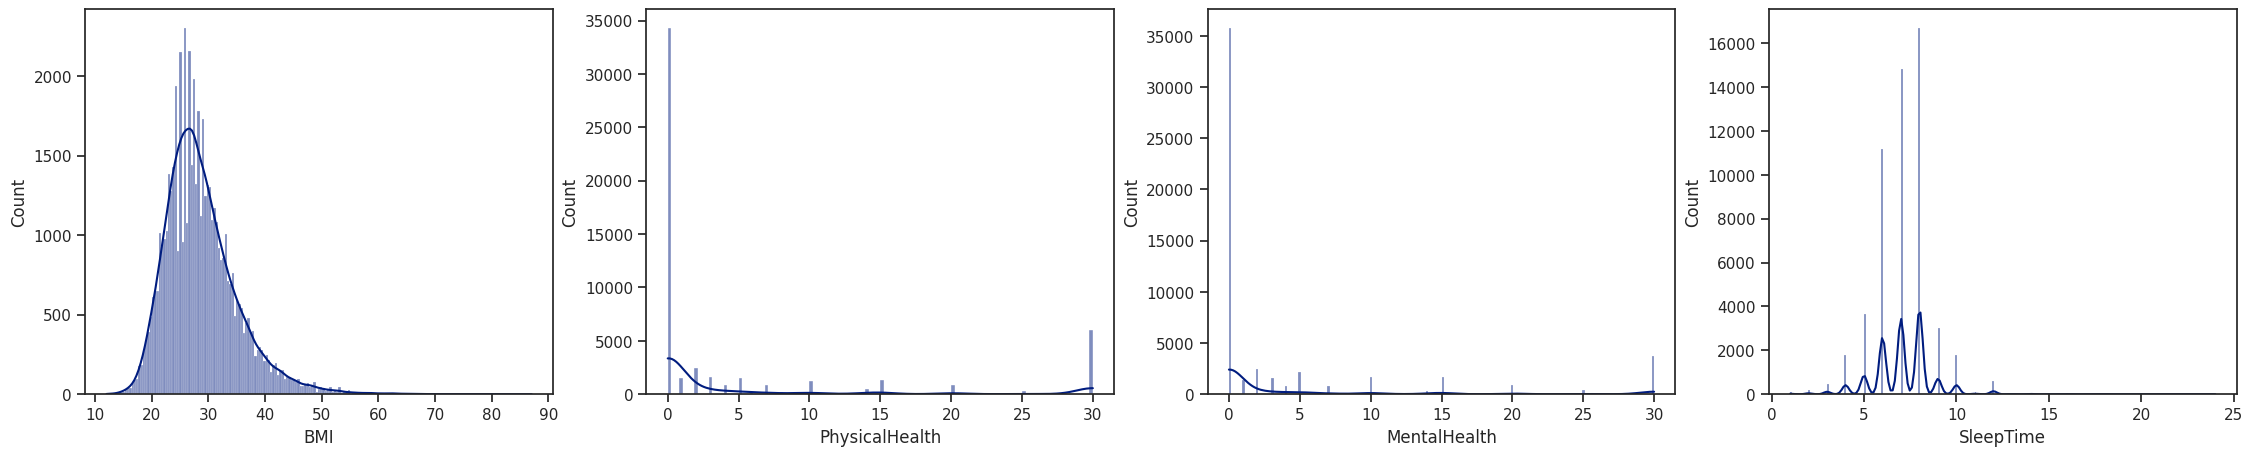

In [ ]:
def numeric_features_func():
  i = 1
  plt.figure(figsize = (35,5))
  for feature in numerical_features:
    plt.subplot(1,5,i)
    sns.set(palette='dark')
    sns.set_style('ticks')
    sns.histplot(df_balanced[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    i+=1

numeric_features_func()

###Bivariate Visualization

##

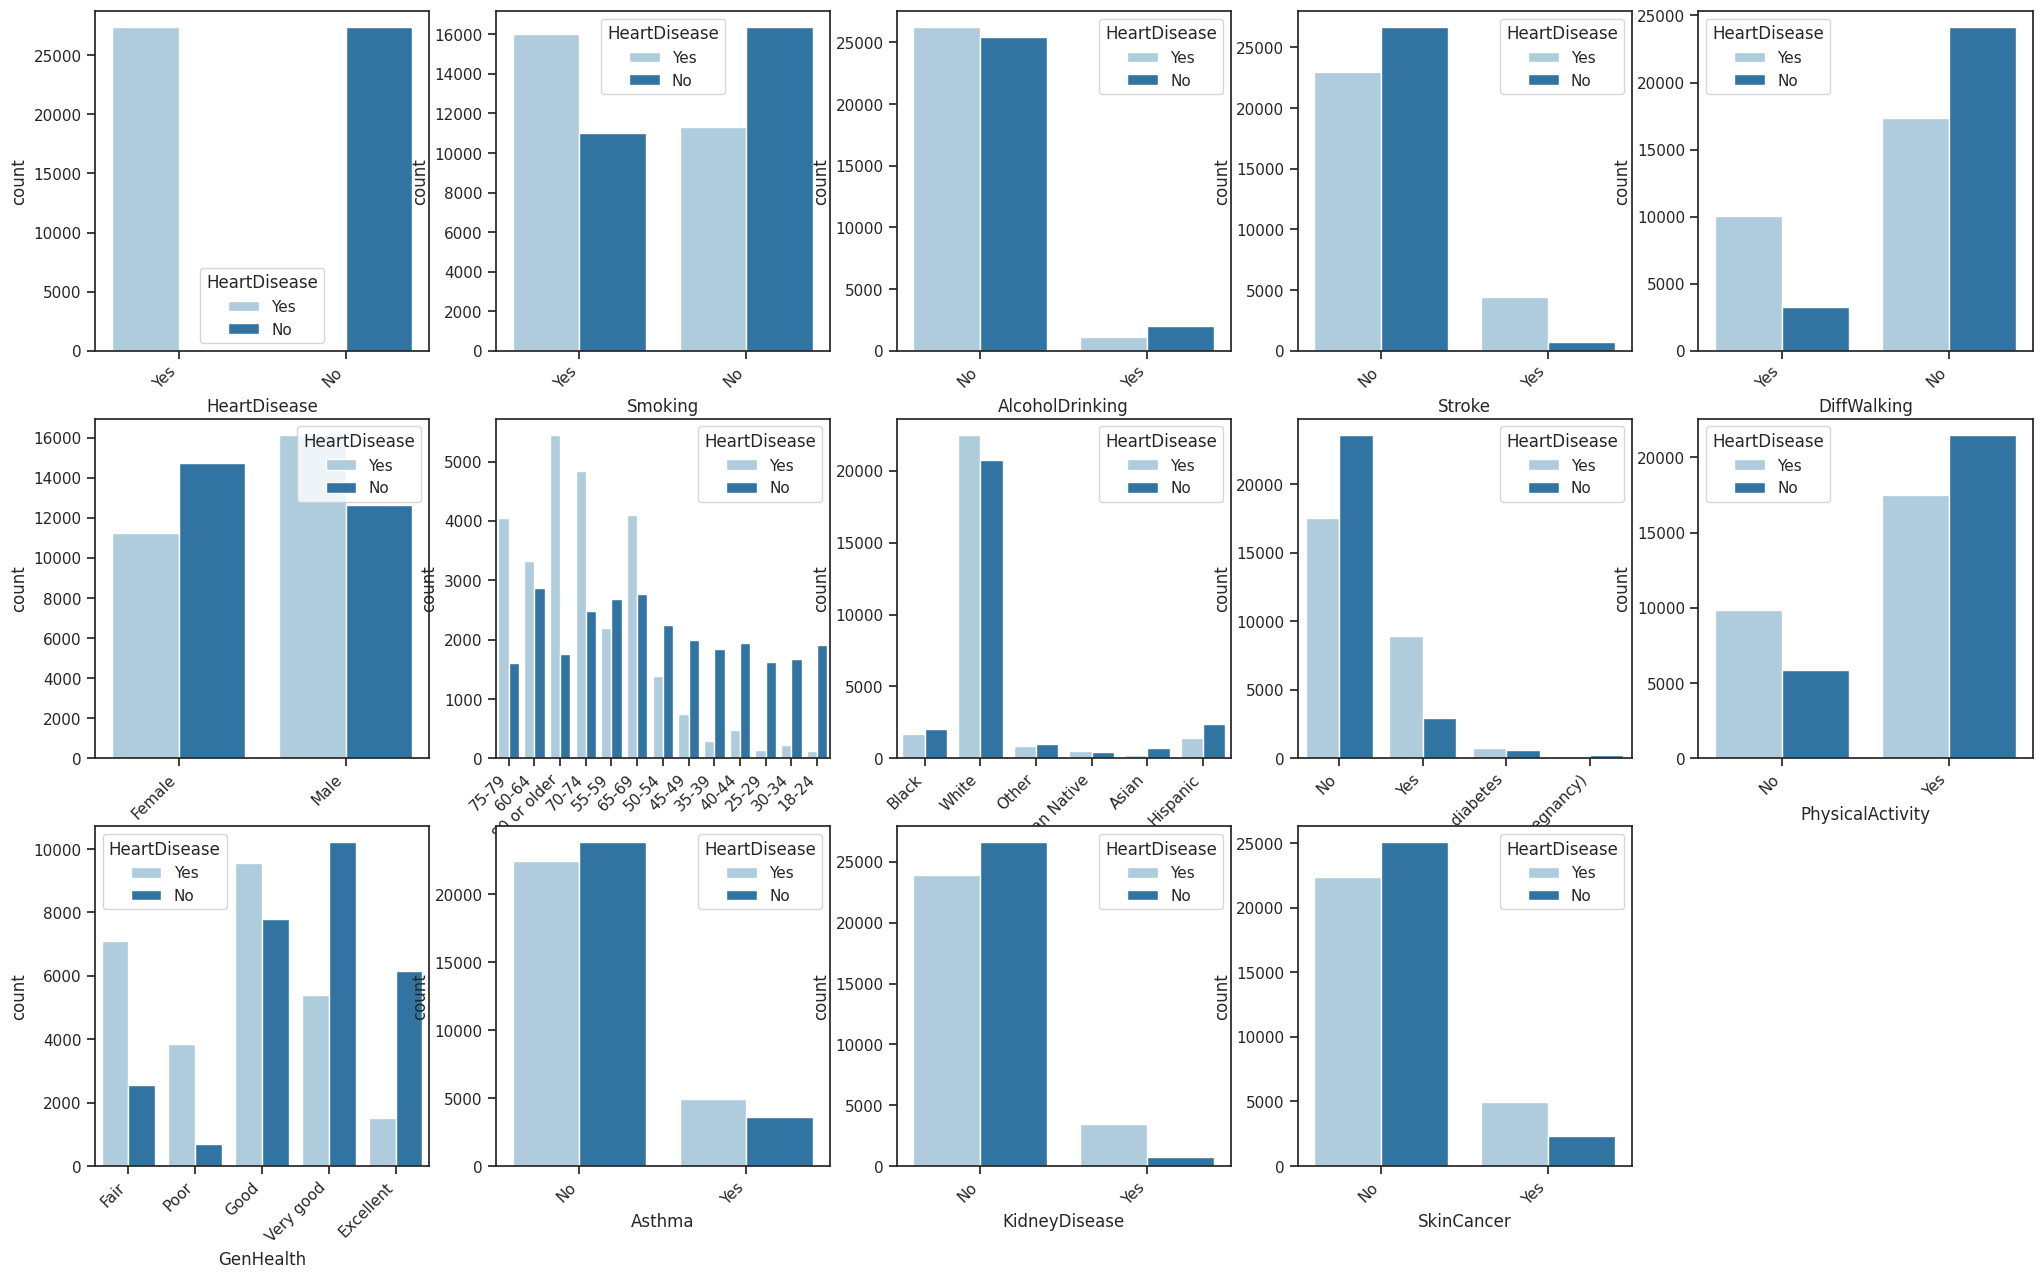

In [ ]:
def bivariate_categorical_feature_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in categorical_features:
    plt.subplot(3,5,i)
    sns.set(palette="Paired")
    sns.set_style('ticks')
    ax = sns.countplot(x = feature , data = df_balanced , hue = 'HeartDisease')
    ax.set_xticklabels(ax.get_xticklabels() , rotation = 45 , ha = "right")
    i += 1

bivariate_categorical_feature_func()

In [ ]:
def bivariate_numerical_features_func(f):
  i = 1
  plt.figure(figsize = (35,5))
  sns.set(palette = 'Paired')
  sns.set_style('ticks')
  for feature in numerical_features:
    plt.subplot(1,5,i)
    sns.boxplot(y=df_balanced[feature], x = df_balanced[f])
    i += 1

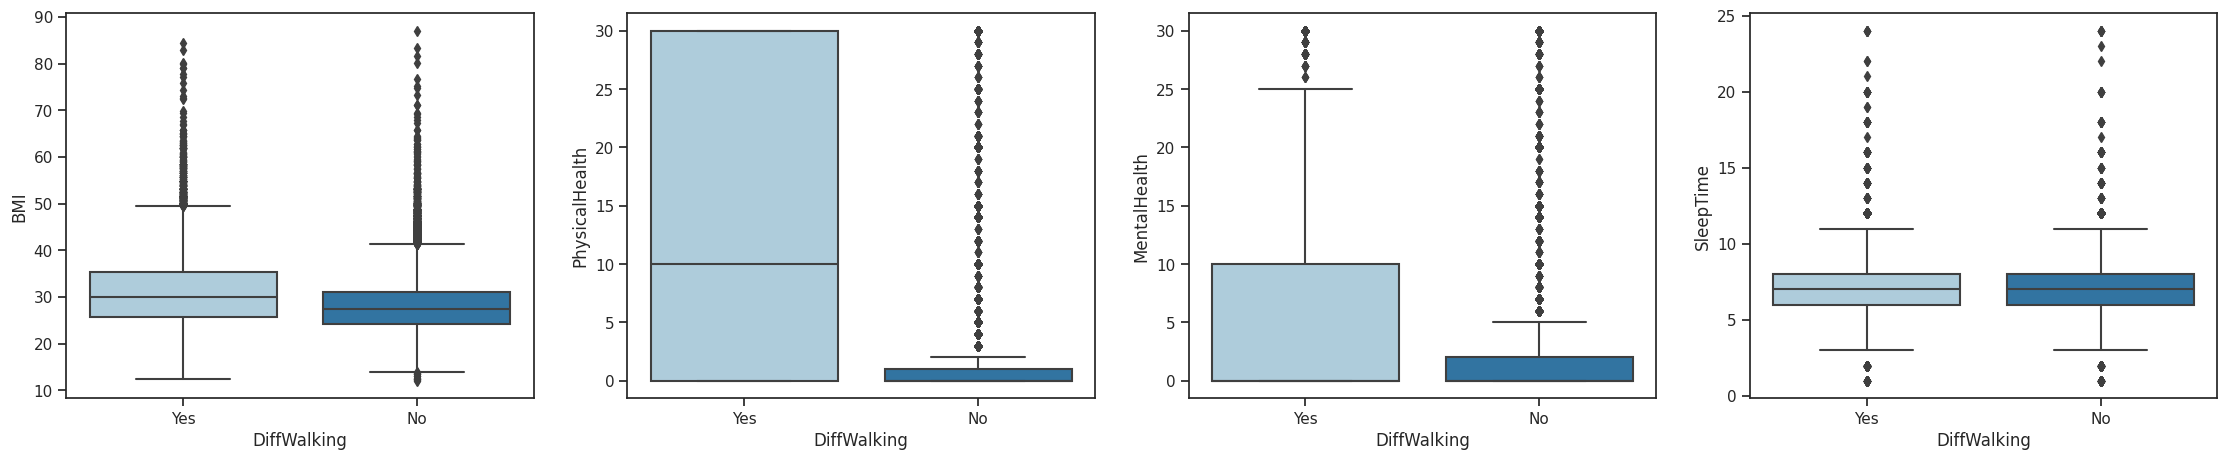

In [ ]:
bivariate_numerical_features_func('DiffWalking')

In [ ]:
categorical_features

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,Yes,No,No,Yes,Female,75-79,Black,No,No,Fair,No,No,No
1,Yes,Yes,No,No,Yes,Male,60-64,White,Yes,No,Poor,Yes,No,No
2,Yes,Yes,No,Yes,Yes,Male,75-79,White,Yes,Yes,Poor,No,No,Yes
3,Yes,No,No,No,Yes,Female,80 or older,White,Yes,No,Good,No,No,Yes
4,Yes,Yes,No,No,Yes,Female,75-79,White,Yes,Yes,Fair,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,No,No,No,No,No,Male,55-59,American Indian/Alaskan Native,No,Yes,Very good,Yes,No,Yes
54742,No,No,No,No,No,Female,25-29,Hispanic,Yes (during pregnancy),Yes,Good,No,No,No
54743,No,No,No,No,No,Female,45-49,White,No,Yes,Good,No,No,No
54744,No,Yes,No,No,No,Male,25-29,Asian,No,Yes,Excellent,No,No,No


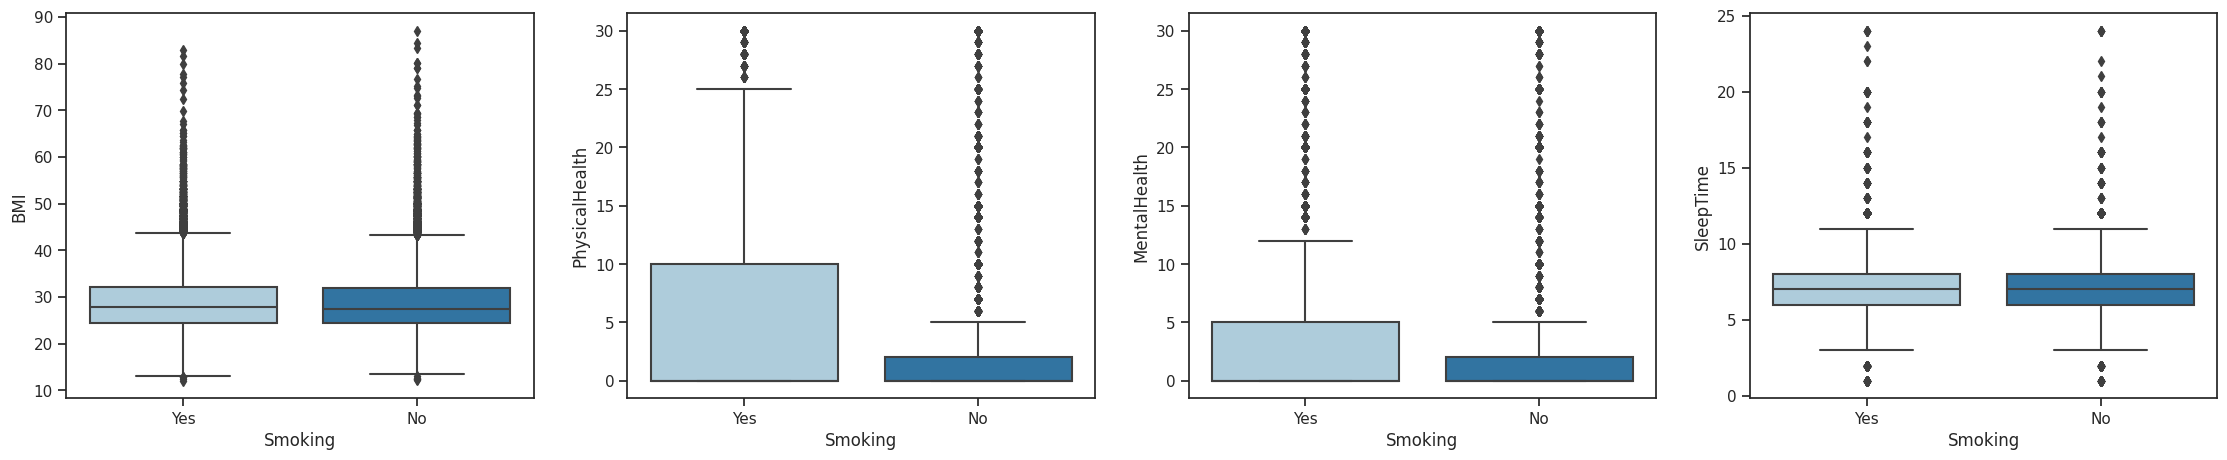

In [ ]:
bivariate_numerical_features_func('Smoking')

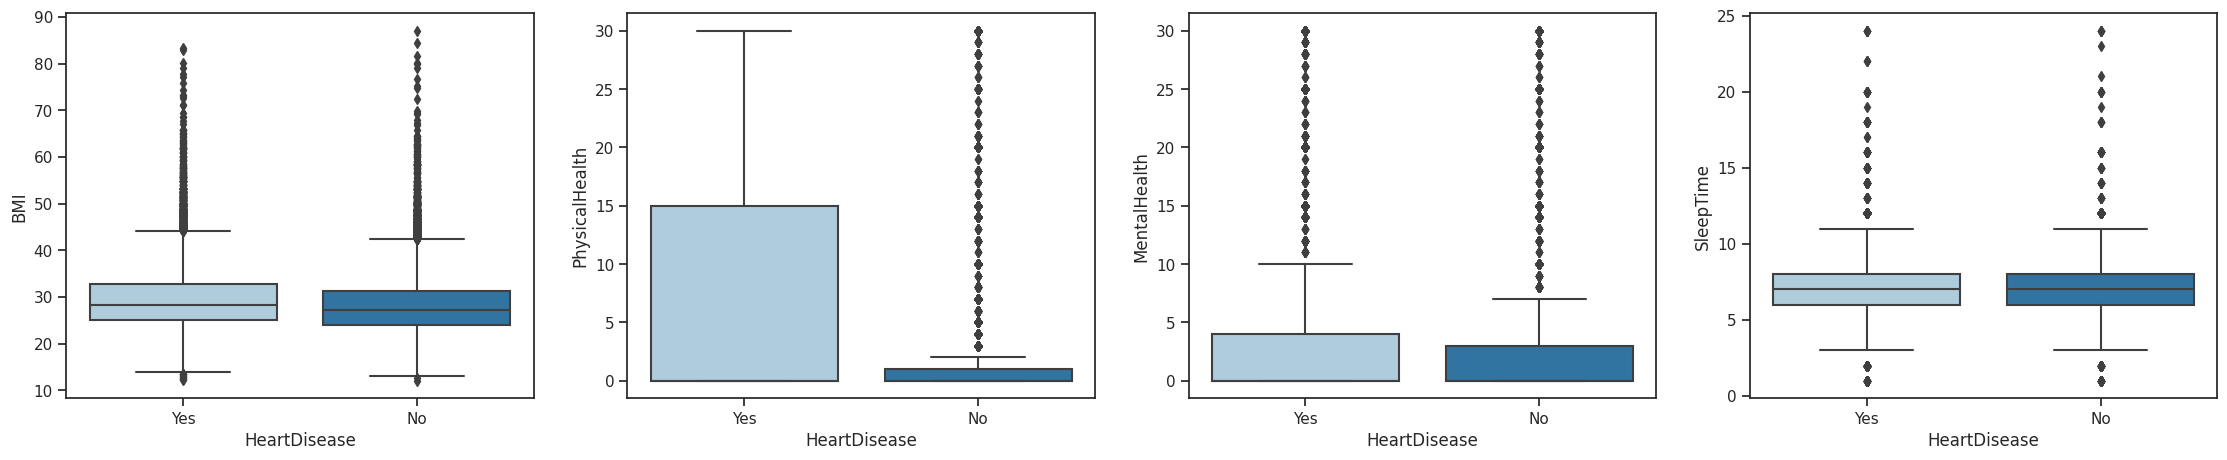

In [ ]:
bivariate_numerical_features_func('HeartDisease')